# Fire Incidents Metric

### By Luis Castellanos

When I first started looking at datasets, I wanted to find something health-related because of how relevant it would be during these times. But, when I came across this dataset that describes fire incidents in Pittsburgh, I figured it would be an interesting metric since it's not something that I would think about when choosing which neighboorhood to live in. Although it's not the first metric that comes to anyone's mind if they want to live in Pittsburgh, it still holds great weight in places like California that suffer from wildfires often. So, being able to compare the number of fire incidents from one neighboorhood to another may help individuals find the 'best' and safest neighboorhood.

    This dataset describes the number and type of fire incidents reported to the Pittsburgh Bureau of Fire.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

    Here is a sample of the dataset. It is a list of fire incidents that contains key information, such as the neighboorhood in which the incident occurred, the type of incident, and the date of each.

In [3]:
# Read the dataset and show the first five items

incidents = pd.read_csv("fireIncidents.csv")
incidents=incidents.dropna(subset=['neighborhood']).reset_index(drop='true') #drop incidents that are not associated with a neighborhood
incidents.head()


,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,F130000539,112.0,Fires in structure other than in a building,"4500 BLOCK LIBERTY AVE, PITTSBURGH PA 15216",2013-01-02T23:34:05,1,231EN06,903.0,Bloomfield,7.0,8.0,4.200308e+10,2.0,8.0,5.0,3-6,40.462918,-79.951864
1,F130000714,118.0,"Trash or rubbish fire, contained","1200 BLOCK CHISLETT ST, PITTSBURGH PA 15206",2013-01-03T16:36:54,1,231EN07,1014.0,Morningside,7.0,10.0,4.200310e+10,2.0,10.0,5.0,3-7,40.479532,-79.928185
2,F130000772,118.0,"Trash or rubbish fire, contained","5800 BLOCK ELLSWORTH AVE, PITTSBURGH PA 15206",2013-01-03T20:54:02,1,231EN08,705.0,Shadyside,8.0,7.0,4.200307e+10,2.0,7.0,4.0,3-11,40.455850,-79.930435
3,F130001276,142.0,Brush or brush-and-grass mixture fire,"1100 BLOCK PEMBERTON ST, PITTSBURGH PA 15212",2013-01-06T00:21:30,0,231EN35,2708.0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,40.482827,-80.030415
4,F130001631,115.0,"Incinerator overload or malfunction, fire conf...","300 BLOCK 3RD AVE, PITTSBURGH PA 15219",2013-01-07T17:16:58,1,231EN04,201.0,Central Business District,6.0,1.0,4.200302e+10,6.0,1.0,2.0,1-4,40.438809,-80.001619


    There are several columns that have no practical use for this metric, like call_no, incident_type, and public_works_division. So, we can choose to only work with the columns that are useful for this metric. 

In [4]:
rel_incidents=incidents[['type_description','neighborhood']]

rel_incidents.head()

,type_description,neighborhood
0,Fires in structure other than in a building,Bloomfield
1,"Trash or rubbish fire, contained",Morningside
2,"Trash or rubbish fire, contained",Shadyside
3,Brush or brush-and-grass mixture fire,Brighton Heights
4,"Incinerator overload or malfunction, fire conf...",Central Business District


    Next, we count the number of fire incidents in each neighborhood

In [12]:
count_incidents=rel_incidents['neighborhood'].value_counts()
count_incidents.head() #sample of the first five neighborhoods

Carrick                      230
Central Business District    208
South Side Flats             202
Squirrel Hill South          200
Hazelwood                    200
Name: neighborhood, dtype: int64

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [45]:
test=pd.DataFrame(count_incidents)
test=100*test/test.sum()

test.plot

    We can use a bar graph to visualize the number of fire incidents per neighborhood.

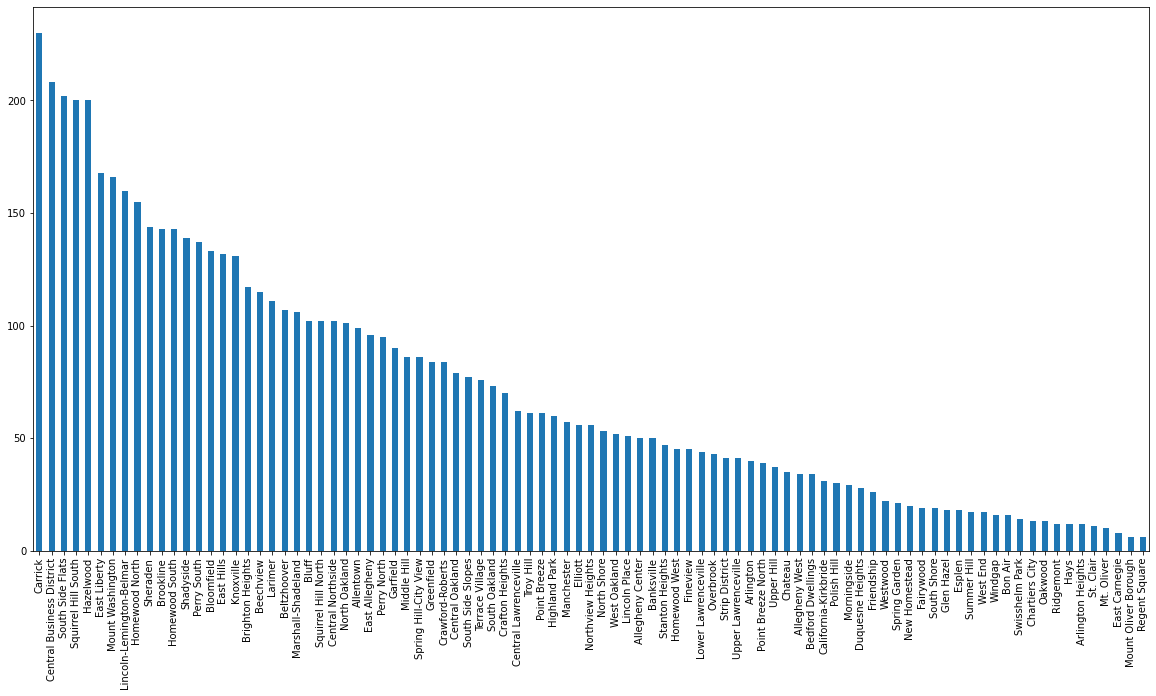

In [7]:
plt.figure(figsize=(20,10)) # extra room for all the neighborhoods
count_incidents.plot(kind='bar')

    We have counted the number of incidents for each neighborhood. But, some people may be interested in the frequency of particular types of fire-related incidents. We can start by creating a new DataFrame that lists every instance of every type of incident in each neighborhood (i.e. not unique instances). This may seem pointless, but will be useful later when we need to count the instances.
    To do this, we first created a dictionary containing each neighborhood, and appended to it each instance of an incident. Then, a data frame was created from the resulting dictionary

In [8]:
cat_fcount=dict()
i=0
while(i<len(rel_incidents)): #appends all instances to the corresponding neighborhood
    cat_fcount.setdefault(rel_incidents.loc[i]['neighborhood'],[]).append(rel_incidents.loc[i]['type_description'])
    i+=1
    
stacked=pd.DataFrame.from_dict(cat_fcount,orient='index') #creates DataFrame from the dictionary cat_fcount
stacked=stacked.transpose()
stacked.head()

,Bloomfield,Morningside,Shadyside,Brighton Heights,Central Business District,Larimer,Carrick,South Side Flats,Squirrel Hill North,Homewood North,...,Spring Garden,Esplen,Regent Square,Mt. Oliver,Summer Hill,Allegheny West,East Carnegie,Mount Oliver Borough,Hays,Arlington Heights
0,Fires in structure other than in a building,"Trash or rubbish fire, contained","Trash or rubbish fire, contained",Brush or brush-and-grass mixture fire,"Incinerator overload or malfunction, fire conf...",Building fire,Building fire,"Cooking fire, confined to container","Cooking fire, confined to container",Construction or demolition landfill fire,...,Passenger vehicle fire,Building fire,"Cooking fire, confined to container","Outside rubbish fire, Other",Passenger vehicle fire,"Outside rubbish fire, Other",Grass fire,"Outside rubbish, trash or waste fire","Outside rubbish fire, Other","Outside rubbish fire, Other"
1,Building fire,"Outside rubbish, trash or waste fire","Fuel burner/boiler malfunction, fire confined","Trash or rubbish fire, contained","Outside rubbish, trash or waste fire","Trash or rubbish fire, contained",Building fire,"Outside rubbish, trash or waste fire","Cooking fire, confined to container","Outside rubbish fire, Other",...,"Natural vegetation fire, Other",Building fire,Passenger vehicle fire,Building fire,Passenger vehicle fire,"Outside rubbish fire, Other","Cooking fire, confined to container",Road freight or transport vehicle fire,Brush or brush-and-grass mixture fire,"Cooking fire, confined to container"
2,"Mobile property (vehicle) fire, Other","Cooking fire, confined to container",Building fire,"Cooking fire, confined to container","Cooking fire, confined to container",Passenger vehicle fire,"Cooking fire, confined to container","Outside rubbish fire, Other","Fuel burner/boiler malfunction, fire confined","Outside rubbish fire, Other",...,"Outside rubbish fire, Other","Forest, woods or wildland fire","Outside rubbish fire, Other","Outside rubbish, trash or waste fire","Outside rubbish fire, Other","Commercial Compactor fire, confined to rubbish",Fires in structure other than in a building,Building fire,Building fire,"Cooking fire, confined to container"
3,"Special outside fire, Other","Outside rubbish, trash or waste fire",Grass fire,Building fire,Dumpster or other outside trash receptacle fire,Outside storage fire,Passenger vehicle fire,"Outside rubbish fire, Other","Cooking fire, confined to container",Construction or demolition landfill fire,...,"Outside rubbish fire, Other","Outside rubbish, trash or waste fire",Building fire,"Outside rubbish, trash or waste fire",Building fire,Passenger vehicle fire,Building fire,"Outside rubbish, trash or waste fire",Road freight or transport vehicle fire,"Cooking fire, confined to container"
4,"Outside rubbish fire, Other","Outside rubbish, trash or waste fire",Building fire,"Cooking fire, confined to container","Cooking fire, confined to container","Outside rubbish, trash or waste fire",Off-road vehicle or heavy equipment fire,"Cooking fire, confined to container","Cooking fire, confined to container","Trash or rubbish fire, contained",...,"Natural vegetation fire, Other","Outside rubbish, trash or waste fire","Special outside fire, Other",Building fire,Building fire,Dumpster or other outside trash receptacle fire,"Cooking fire, confined to container","Outside rubbish fire, Other","Outside rubbish fire, Other","Cooking fire, confined to container"


    From this last data frame, we can count the instances of each incident and group them by neighborhood under a new data frame

In [14]:
final=pd.DataFrame({"type_description":""},index=[0]) 
by_inc=pd.DataFrame    #new, blank, dataFrames
for i in stacked.columns: #iterates through every column (every neighborhood)
    by_inc=pd.DataFrame(stacked[i].value_counts()).reset_index().rename(columns={"index":"type_description"})
        #value_counts() returns a series, but we want a data frame. Line above does this. 
        #The new data frame has the neighborhood as the index, but we don't want that, so we 'reset the index'. This pushes the current index list as a new column named "index"
        #Finally, the line renames the column to match the data it contains
        
    final=pd.merge(final,by_inc,on='type_description',how='outer').fillna(0) #creates one data frame from all the individual data frames for each neighborhood
final=final.set_index('type_description')
final.head() #sample of final dataFrame

,Bloomfield,Morningside,Shadyside,Brighton Heights,Central Business District,Larimer,Carrick,South Side Flats,Squirrel Hill North,Homewood North,...,Spring Garden,Esplen,Regent Square,Mt. Oliver,Summer Hill,Allegheny West,East Carnegie,Mount Oliver Borough,Hays,Arlington Heights
type_description,,,,,,,,,,,,,,,,,,,,,
,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Cooking fire, confined to container",34.0,5.0,51.0,26.0,50.0,19.0,46.0,59.0,51.0,24.0,...,1.0,1.0,1.0,1.0,2.0,1.0,3.0,0.0,0.0,7.0
Building fire,28.0,1.0,28.0,27.0,19.0,41.0,70.0,22.0,14.0,49.0,...,6.0,4.0,1.0,4.0,4.0,5.0,2.0,2.0,2.0,1.0
Dumpster or other outside trash receptacle fire,11.0,0.0,6.0,6.0,24.0,3.0,2.0,12.0,5.0,4.0,...,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0
"Mobile property (vehicle) fire, Other",9.0,1.0,3.0,4.0,3.0,4.0,3.0,3.0,0.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


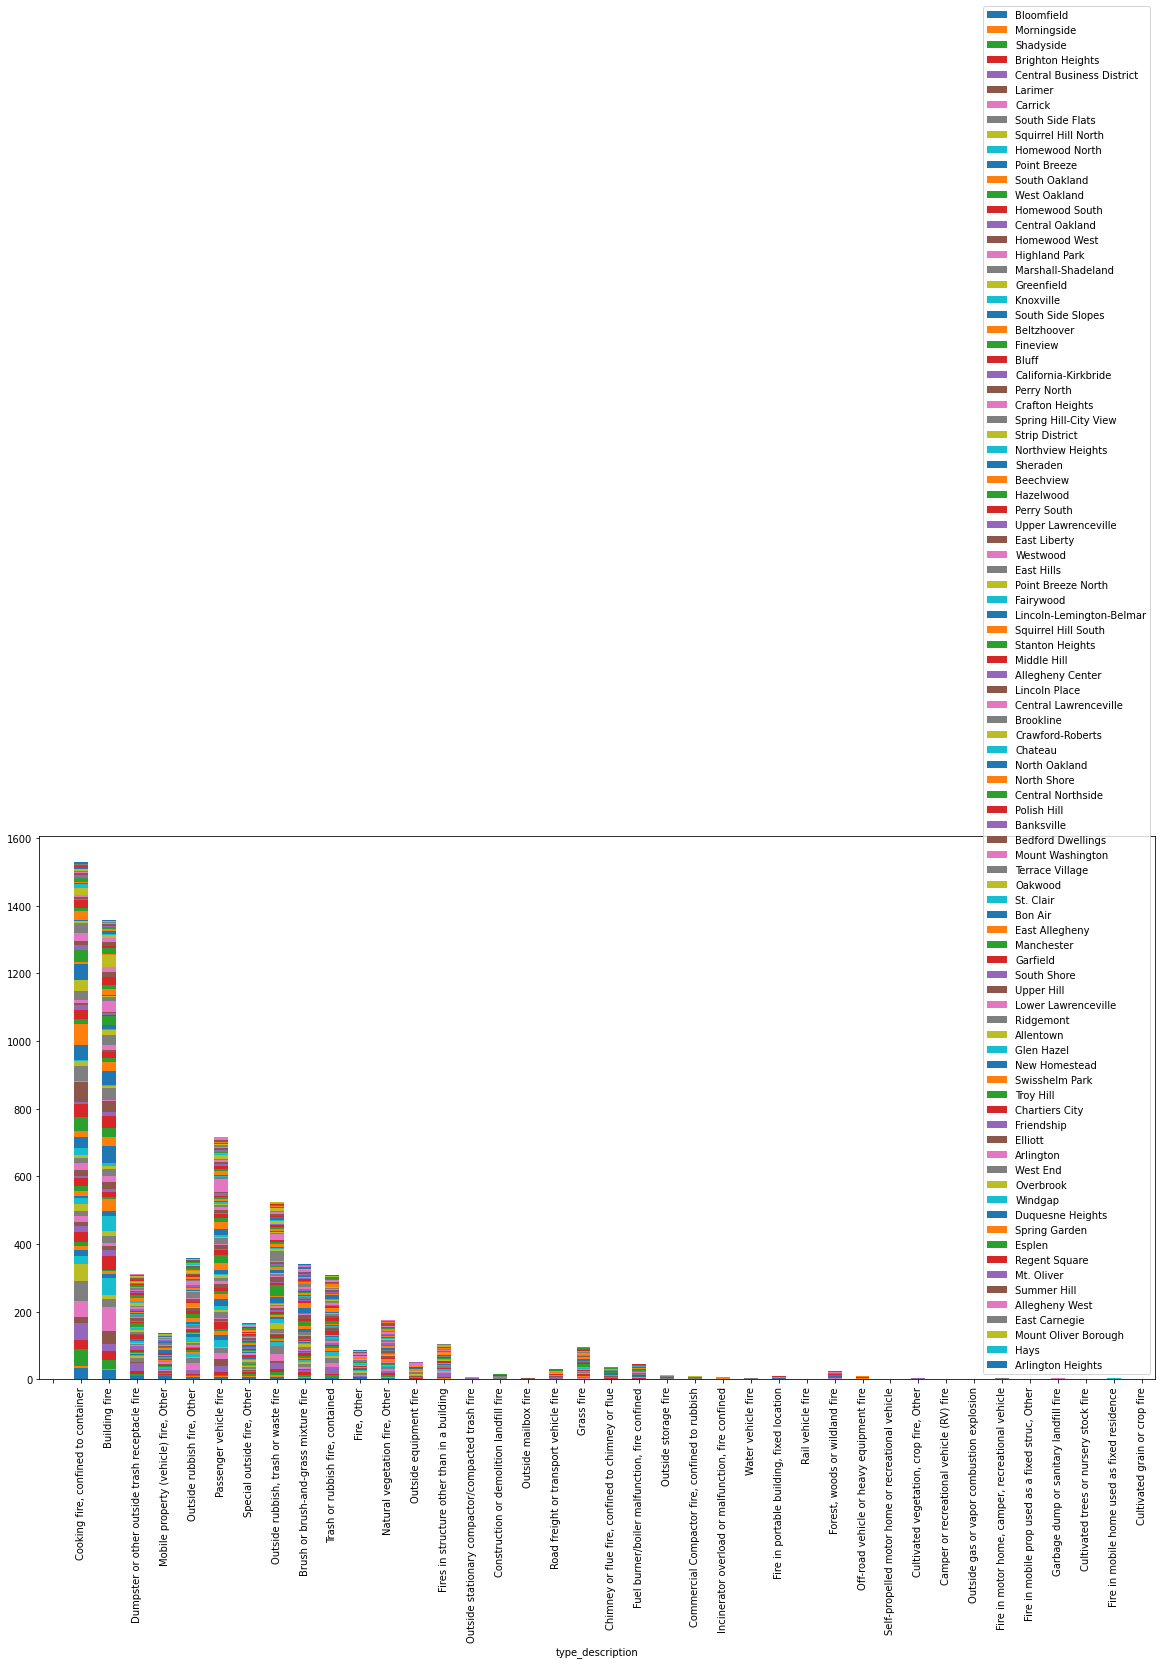

In [11]:

final.plot.bar(figsize=(20,10),stacked=True)

The fact that there are 90 neighborhoods and 39 types of incidents makes these data difficult to work with. As you can see, visualizing it does not say much because it is borderline impossible to read. Nonetheless, the data frame can still be used to find information about a type of incident in a specific neighborhood. Moreover, coming up with a weighted system to describe the relative significance of each type of incident would be extremely tedious and troublesome, so using only the data describing the number of fire-related incidents by neighborhood, we take carrick district to be the worst neighborhood in Pittsburgh, and Regent Square and Mount Oliver Borough to be the best ones. 